In [133]:
### IMPORTS ###
import os
import struct
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, fixed
import ipywidgets as widgets

In [134]:
### SETTINGS ###
np.set_printoptions(precision=20, suppress=True, threshold=np.inf)

In [135]:
### FOLDER SETTINGS ###
input_folder = "../output/"

file_solution_path = input_folder + "/system_solution.dat"
residual_path = input_folder + "/residual_solution.dat"

In [136]:
format_string = '<d'  # '<d' for little-endian, '>d' for big-endian

In [137]:
### Analytical solution functions ###

def true_function(global_domain_begin, global_domain_end, grid_size):
    # Create coordinate arrays for each dimension
    x = np.linspace(global_domain_begin[0], global_domain_end[0], grid_size[0])
    y = np.linspace(global_domain_begin[1], global_domain_end[1], grid_size[1])
    
    # Generate meshgrid from coordinate arrays
    X, Y = np.meshgrid(x, y, indexing='ij')
    
    # Compute function values
    u = 3*X*X + 2*X*Y + Y*Y*Y - 4*Y + 7 + np.exp(3*X)
    u_x = 6*X + 2*Y + 3*np.exp(3*X)
    u_y = 2*X + 3*Y*Y - 4
    u_xx = 6 + 0*X + 9*np.exp(3*X)
    u_yy = 6*Y
    
    return u, u_x, u_y, u_xx, u_yy, X, Y

In [138]:
def plot_function(X, Y, approximate_u, true_u, approximate_derivative, true_derivative):

    solution_error = np.abs(approximate_u - true_u)
    print(f"Max error: {np.max(solution_error):.1e}")

    residual_error = np.abs(approximate_derivative - true_derivative)
    print(f"Max residual error: {np.max(residual_error):.1e}")

    # Create the figure for 3D surface plots
    fig = plt.figure(figsize=(15, 20))

    ax1 = fig.add_subplot(2, 3, 1, projection='3d')
    ax1.plot_surface(X, Y, approximate_u, cmap='viridis')
    ax1.set_title('Approximate u')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    ax2 = fig.add_subplot(2, 3, 2, projection='3d')
    ax2.plot_surface(X, Y, true_u, cmap='viridis')
    ax2.set_title('u')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    ax3 = fig.add_subplot(2, 3, 3, projection='3d')
    ax3.plot_surface(X, Y, np.abs(approximate_u - true_u), cmap='viridis')
    ax3.set_title('Error aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')

    ax4 = fig.add_subplot(2, 3, 4, projection='3d')
    ax4.plot_surface(X, Y, approximate_derivative, cmap='viridis')
    ax4.set_title('Approximate derivative')
    ax4.set_xlabel('x')
    ax4.set_ylabel('y')

    ax5 = fig.add_subplot(2, 3, 5, projection='3d')
    ax5.plot_surface(X, Y, true_derivative, cmap='viridis')
    ax5.set_title('Derivative')
    ax5.set_xlabel('x')
    ax5.set_ylabel('y')

    ax6 = fig.add_subplot(2, 3, 6, projection='3d')
    ax6.plot_surface(X, Y, np.abs(approximate_derivative - true_derivative), cmap='viridis')
    ax6.set_title('Error aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
    ax6.set_xlabel('x')
    ax6.set_ylabel('y')

    # Adjust the spacing between the plots
    #plt.subplots_adjust(wspace=1, hspace=1)
    #plt.tight_layout()
    plt.show()

    return

In [139]:
with open(file_solution_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)

    approximate_solution = data

with open(residual_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)

    residual = data

approximate_solution = np.array(approximate_solution)
residual = np.array(residual)

In [140]:
ndims = 2
num_data_per_elements = 1
grid_size = [32,32]

layout = (grid_size[0], grid_size[1], num_data_per_elements)

In [141]:
approximate_solution = approximate_solution.reshape(layout)
residual = residual.reshape(layout)

approximate_solution = np.squeeze(approximate_solution)
residual = np.squeeze(residual)

In [142]:
domain_begin_array = np.full(ndims, 0.0)
domain_end_array = np.full(ndims, 1.0)

In [143]:
u, u_x, u_y, u_xx, u_yy, X, Y = true_function(domain_begin_array, domain_end_array, grid_size)

Max error: 1.1e-14
Max residual error: 4.8e-08


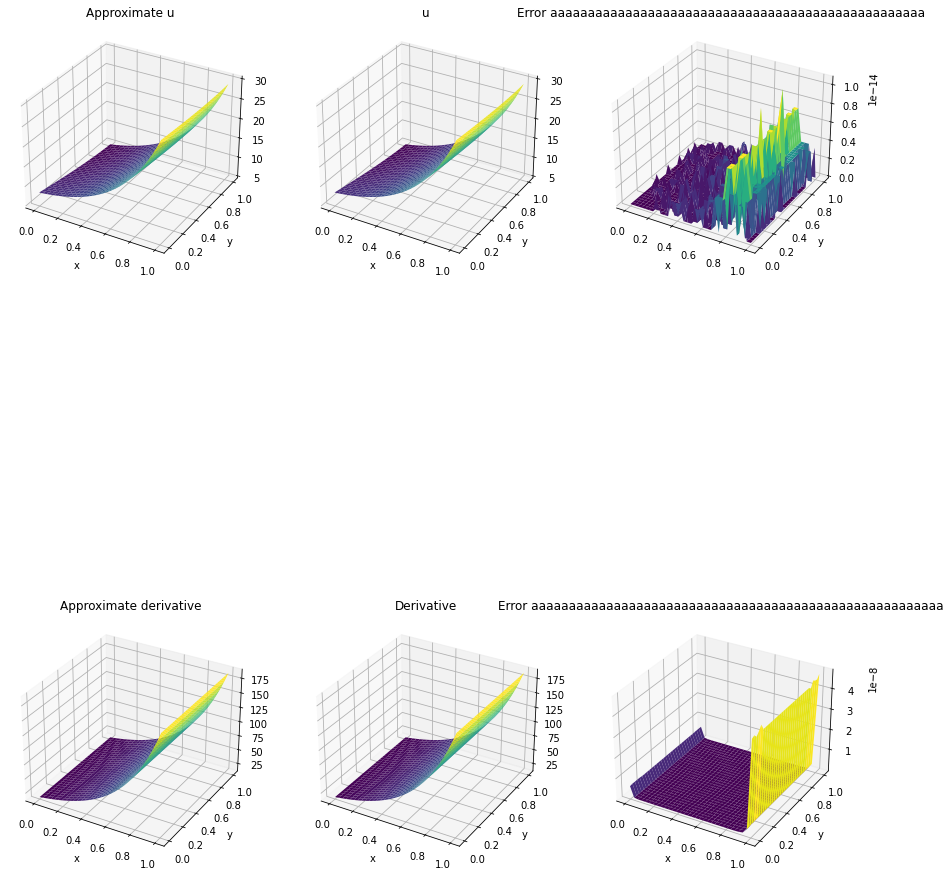

In [144]:
plot_function(X, Y, approximate_solution.T, u, residual.T, u_xx)